In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Load the Data

In [17]:
# load the data
df_energy = pd.read_csv('data/df_energy_processed.csv')
df_weather = pd.read_csv('data/df_weather_processed.csv')
df = pd.read_csv('data/df.csv')

In [18]:
# Convert the column from string to datetime
df['time'] = pd.to_datetime(df['time'], utc=True) # datetime values that are explicitly in UTC

#Set timeframe data for easier accessing
df["year"]= df['time'].dt.year
df["month"]= df['time'].dt.month_name()
df["day"] = df['time'].dt.day_name()
df['hour'] = df['time'].dt.hour

In [19]:
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [20]:
df_original = df.copy()
df.drop(columns=['weather_id', 'time', 'forecast solar day ahead', 'forecast wind onshore day ahead', 'price day ahead'], inplace=True)

In [21]:
pd.set_option('display.max_columns', None) 
print(df.head)

<bound method NDFrame.head of         generation biomass  generation fossil brown coal/lignite  \
0                    449.0                                 328.0   
1                    449.0                                 328.0   
2                    449.0                                 328.0   
3                    449.0                                 328.0   
4                    449.0                                 328.0   
...                    ...                                   ...   
175080               290.0                                   0.0   
175081               290.0                                   0.0   
175082               290.0                                   0.0   
175083               290.0                                   0.0   
175084               290.0                                   0.0   

        generation fossil gas  generation fossil hard coal  \
0                      5196.0                       4755.0   
1                      5196.0

# Encoding Categorical Data

In [22]:
categorical_columns = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [23]:
categorical_columns

Index(['city_name', 'weather_main', 'weather_description', 'month', 'day'], dtype='object')

In [24]:
df_encoded.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other',
       ...
       'month_November', 'month_October', 'month_September', 'day_Friday',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday'],
      dtype='object', length=104)

In [25]:
# Reinsert the target column at the last position
column_to_move = df_encoded.pop('price actual')
df_encoded['price actual'] = column_to_move

In [26]:
X = df_encoded.iloc[:, :-1].values
y = df_encoded.iloc[:, -1].values

- we have a large no. of columns due to encoding.

# Splitting dataset into Training and Test

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Models

## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 9.782958595914405


## Polynomial Regression

In [15]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# regressor = LinearRegression()
# regressor.fit(X_train_poly, y_train)

# y_pred = regressor.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# print("RMSE:", rmse)

## Ridge & Lasso

In [19]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=0.05, max_iter=10000)  # You can adjust the alpha (regularization strength) as needed
lasso_model = Lasso(alpha=0.01, max_iter=10000)

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# predictions
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

#Evaluate
ridge_mse = mean_squared_error(y_test, ridge_predictions, squared=False)
lasso_mse = mean_squared_error(y_test, lasso_predictions, squared=False)
print("Ridge Regression RMSE:", ridge_mse)
print("Lasso Regression RMSE:", lasso_mse)

Ridge Regression RMSE: 9.782953240049638
Lasso Regression RMSE: 9.78786311584441


## Support Vector Regression

In [20]:
from sklearn.svm import SVR

# Create the SVR model
svr_model = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'poly', or 'sigmoid'

# Train the model using the training data
svr_model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = svr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Squared Error:", mse)

## Decision Tree

In [16]:
# from sklearn.tree import DecisionTreeRegressor

# decision_tree = DecisionTreeRegressor(random_state=42)
# decision_tree.fit(X_train, y_train)

# y_pred = decision_tree.predict(X_test)

# # Evaluate
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.2035472399619391


In [15]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['squared_error'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_regressor = grid_search.best_estimator_

y_pred = best_regressor.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1.2058341135839765


## Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.7312178666884529


# Observation

- Out of the traditional ML models that were used, Random Forest Regressor had the lowest RMSE (0.73) & Linear Regressor performs the worst.
- The next step would be to explore the Time-Series specific models.

# Plots

In [30]:
# Calculate the number of samples used for testing (assuming 'data' is the original numpy array)
num_samples_test = int(len(X) * 0.2)

# Get the indices of rows that were used for testing
indices_test = np.arange(start=len(X)-num_samples_test, stop=len(X))

Indices of rows in the original data used for testing: [140068 140069 140070 ... 175082 175083 175084]


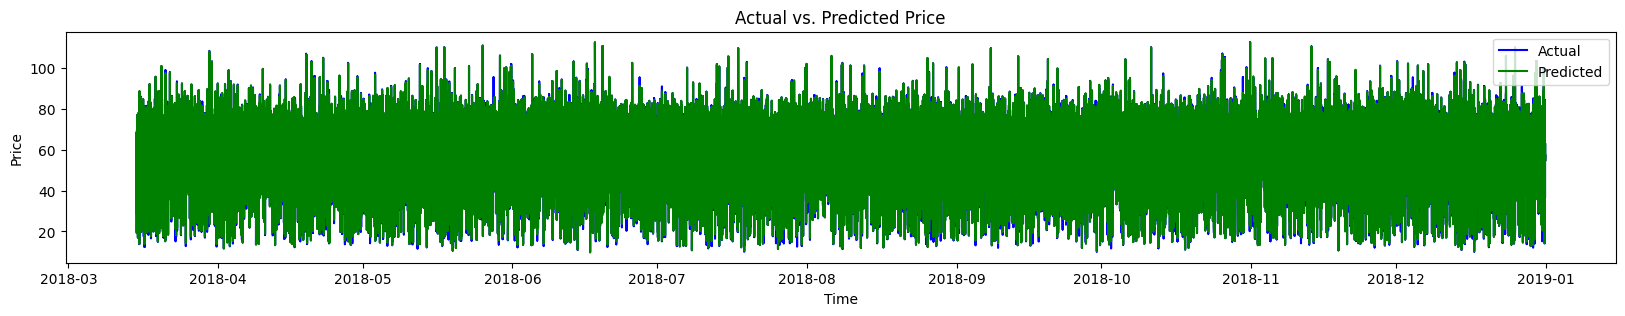

In [53]:
# Random Forest regressor

# Plot the actual values (y_test) and predicted values (y_pred) on the same plot
plt.figure(figsize=(20, 3))
plt.plot(df_original['time'].loc[(len(X)-num_samples_test): len(X)], y_test, label='Actual', color='blue')
plt.plot(df_original['time'].loc[(len(X)-num_samples_test): len(X)], y_pred, label='Predicted', color='green')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price')
plt.legend()

# Show the plot
plt.show()

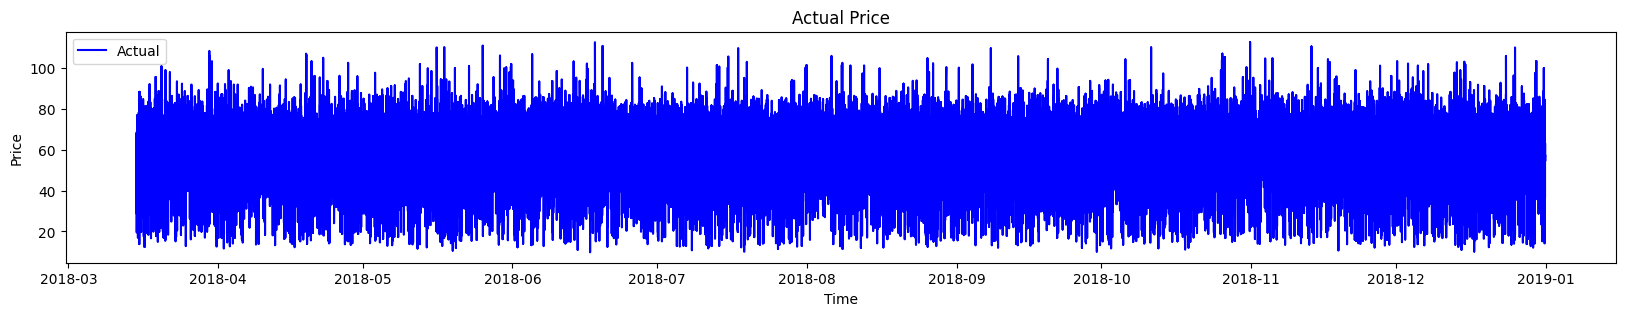

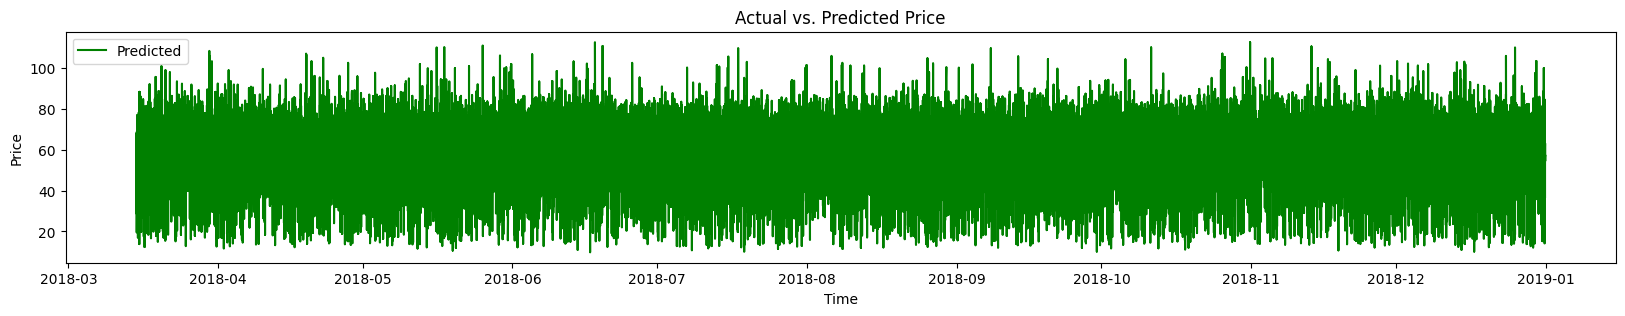

In [57]:
# Plot only the actual values (y_test)
plt.figure(figsize=(20, 3))
plt.plot(df_original['time'].loc[(len(X)-num_samples_test): len(X)], y_test, label='Actual', color='blue')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual Price')
plt.legend()
plt.show()


# Plot only the predicted values (y_pred)
plt.figure(figsize=(20, 3))
plt.plot(df_original['time'].loc[(len(X)-num_samples_test): len(X)], y_test, label='Predicted', color='green')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price')
plt.legend()
plt.show()

- Looking at the actual and predicted values in the plots above, we cannot visually observe any difference. It might be due to 5 different datapoints for the same time as we have 5 different cities. Lets see if we can see any difference if we take the mean of all cities, resulting in only one datapoint for one time.